In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
merged_df = titles = pd.read_csv('../data_files/TechnicalJobs_Not_DF_draft_UPDATED.csv')
merged_df

,Unnamed: 0,istech,area_title,jobs_1000,tot_emp,emp_prse,population,median_age,average_income,family_poverty,...,race_asian,race_white,race_black,race_hispanic,race_native,race_islander,race_two,race_other,city,state_code
0,0,0,"Abilene, TX",12.048520,182230.0,18.251528,85075,27,49583,9368,...,2253,53385,8597,18241,524,15,1860,200,Abilene,TX
1,1,1,"Abilene, TX",8.409250,4450.0,22.500000,85075,27,49583,9368,...,2253,53385,8597,18241,524,15,1860,200,Abilene,TX
2,2,0,"Akron, OH",7.321090,859710.0,19.450928,94894,33,42943,25508,...,2164,54490,31493,1761,134,22,4765,65,Akron,OH
3,3,1,"Akron, OH",6.404353,33910.0,18.882353,94894,33,42943,25508,...,2164,54490,31493,1761,134,22,4765,65,Akron,OH
4,4,0,"Albany, GA",13.685161,153970.0,18.692708,64884,37,59234,13830,...,948,20685,40100,1737,96,24,1241,53,Albany,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,305,1,"Winston-Salem, NC",5.070765,22180.0,14.558824,33082,27,34263,1864,...,1351,22926,5736,2099,57,0,846,67,Winston-Salem,NC
306,306,0,"Yakima, WA",10.979800,252670.0,17.385490,46258,32,52787,7262,...,285,20719,340,23274,494,10,1095,41,Yakima,WA
307,307,1,"Yakima, WA",4.708300,4250.0,13.860000,46258,32,52787,7262,...,285,20719,340,23274,494,10,1095,41,Yakima,WA
308,308,0,"Yuba City, CA",15.261576,114460.0,21.675294,40959,33,60353,6881,...,3892,19336,874,14832,258,195,1504,68,Yuba City,CA


<AxesSubplot:xlabel='state_code', ylabel='tot_emp'>

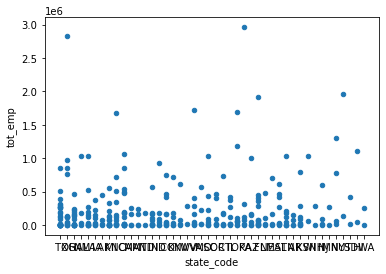

In [3]:
# find relationship
merged_df.plot(kind='scatter', x='state_code', y='tot_emp')

In [4]:
merged_copy_df = merged_df.drop(['Unnamed: 0'],axis=1)

In [5]:
merged_copy_df.isnull().values.any()

False

In [6]:
merged_copy_df.shape

(310, 24)

In [7]:
merged_copy_df.columns.to_list()

['istech',
 'area_title',
 'jobs_1000',
 'tot_emp',
 'emp_prse',
 'population',
 'median_age',
 'average_income',
 'family_poverty',
 'educational_attainment_bachelors',
 'educational_attainment_graduate',
 'educational_attainment_high_school',
 'educational_attainment_no_diploma',
 'educational_attainment_some_college',
 'race_asian',
 'race_white',
 'race_black',
 'race_hispanic',
 'race_native',
 'race_islander',
 'race_two',
 'race_other',
 'city',
 'state_code']

In [8]:
# drop city    state_code   to feed data to scaler # NEED TO DISCUSS THESE COLUMNS 
merged_copy_df = merged_copy_df.drop(['city','state_code','area_title'],axis=1)

In [9]:
merged_copy_df.dtypes

istech                                   int64
jobs_1000                              float64
tot_emp                                float64
emp_prse                               float64
population                               int64
median_age                               int64
average_income                           int64
family_poverty                           int64
educational_attainment_bachelors         int64
educational_attainment_graduate          int64
educational_attainment_high_school       int64
educational_attainment_no_diploma        int64
educational_attainment_some_college      int64
race_asian                               int64
race_white                               int64
race_black                               int64
race_hispanic                            int64
race_native                              int64
race_islander                            int64
race_two                                 int64
race_other                               int64
dtype: object

In [10]:
# The employment-to-population ratio  tot_emp/population = ex (182230/85075=2.14) 
# how come tot employement is more than total population 
merged_copy_df.head(10)

,istech,jobs_1000,tot_emp,emp_prse,population,median_age,average_income,family_poverty,educational_attainment_bachelors,educational_attainment_graduate,...,educational_attainment_no_diploma,educational_attainment_some_college,race_asian,race_white,race_black,race_hispanic,race_native,race_islander,race_two,race_other
0,0,12.048520,182230.0,18.251528,85075,27,49583,9368,12687,6935,...,10738,29001,2253,53385,8597,18241,524,15,1860,200
1,1,8.409250,4450.0,22.500000,85075,27,49583,9368,12687,6935,...,10738,29001,2253,53385,8597,18241,524,15,1860,200
2,0,7.321090,859710.0,19.450928,94894,33,42943,25508,10769,5611,...,13742,31013,2164,54490,31493,1761,134,22,4765,65
3,1,6.404353,33910.0,18.882353,94894,33,42943,25508,10769,5611,...,13742,31013,2164,54490,31493,1761,134,22,4765,65
4,0,13.685161,153970.0,18.692708,64884,37,59234,13830,9365,7235,...,9037,21217,948,20685,40100,1737,96,24,1241,53
5,1,10.047429,4120.0,16.414286,64884,37,59234,13830,9365,7235,...,9037,21217,948,20685,40100,1737,96,24,1241,53
6,0,6.598983,1040140.0,16.331591,319991,35,61589,42306,66219,56998,...,25103,105387,8437,153880,9545,126499,13606,213,6795,1016
7,1,6.331062,37920.0,14.900000,319991,35,61589,42306,66219,56998,...,25103,105387,8437,153880,9545,126499,13606,213,6795,1016
8,0,13.515040,155190.0,18.862687,59184,38,57892,10955,7768,5315,...,9059,16030,1856,23883,30783,1494,206,7,924,31
9,1,12.729750,2900.0,17.975000,59184,38,57892,10955,7768,5315,...,9059,16030,1856,23883,30783,1494,206,7,924,31


In [11]:
X = merged_copy_df.drop('jobs_1000',axis=1)#features
y = merged_copy_df['jobs_1000'] #Target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)


In [13]:
regressor =RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [14]:
y_predict = regressor.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.506148532320543

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
mse

6.150257166753451

In [17]:
np.sqrt(mse)

2.4799712028072927

<AxesSubplot:ylabel='Density'>

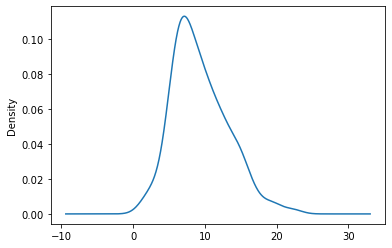

In [18]:
merged_copy_df["jobs_1000"].plot(kind = 'density')

In [19]:
X = merged_copy_df.drop('tot_emp',axis=1)#features
y = merged_copy_df['tot_emp'] #Target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [21]:
regressor =RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [22]:
y_predict = regressor.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8866644990908225

In [24]:
# number is too high because total employemnet is a big number Need to learn how to scale it 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
mse

16367266217.016129

In [25]:
np.sqrt(mse)

127934.616961228

<AxesSubplot:ylabel='Density'>

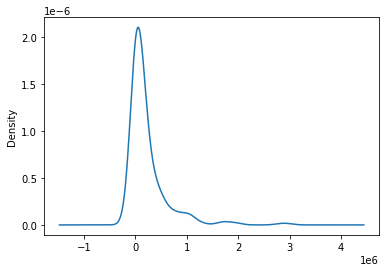

In [26]:
merged_copy_df["tot_emp"].plot(kind = 'density')